<a href="https://colab.research.google.com/github/paesgo11-cmd/Estadistica2026B/blob/main/house_prices/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de precios de la vivienda**
####****Proyecto Inferencial II****



#####****Paola Escobedo Gómez****

####****INTRODUCCIÓN****
El mercado inmobiliario está influenciado por múltiples factores que determinan el precio de una vivienda, entre ellos sus características físicas, la ubicación y las condiciones económicas de la región. Analizar estas variables permite comprender mejor el comportamiento del mercado y apoyar la toma de decisiones.

El objetivo de este proyecto es analizar la relación entre la distancia al centro de la ciudad y el precio de la vivienda mediante el uso de un modelo de regresión lineal, con el fin de realizar predicciones del valor de las viviendas.

Y todos estos analisis son importantes para que todos aquellos interesados adquirir estos tipos de bienes entiendan cómo estas variables afectan su precio y se pueda tomar la mejor decisiones.

####****HIPOTESIS****
**- Hipótesis nula (H0):**

No existe relación realmente significante entre la distancia a la que se encuentra del centro de la ciudad y el precio de la vivienda.

**- Hipótesis alternativa (H1):**

Existe una relación realmente significante entre la distancia a la que se encuentra del centro de la ciudad y el precio de la vivienda; a mayor distancia, menor es el precio de la vivienda.


####****MARCO TEORICO****
De este análisis vamos a estar utilizando lo que son una base de datos la cual se extrajo de Kaagle, el cual está relacionada con la predicción de los precios en las viviendas tomando en cuenta la relación que pueden llegar a tener el precio con el número de habitaciones, distancia la que se encuentra del centro, la antigüedad o años que tenga la vivienda, así como también su superficie. En este caso únicamente nos vamos a basar en la relación que hay entre su precio final y con la distancia de la que se encuentra del centro.
Todo esto será con ayuda de determinar el nivel de correlación que puede existir entre estas variables así como también determinando sus coeficientes o terminación para saber que tantos datos me está proporcionando para poder determinar esto y determinar que tan cierto o falso, es nuestra hipótesis.

####****METODOLOGÍA****

***PASO 0***

In [169]:

# 0.1 Repositorios desde: www.github.com
# 0.2 Extraer base de datos: www.kaggle.com
#   0.2.1 Extraer base de datos desde el link en código

link = "https://raw.githubusercontent.com/paesgo11-cmd/Estadistica2026B/refs/heads/main/house_prices/house_prices_datset.csv"

import numpy as np

df = pd.read_csv(link)

df

,pies_cuadrados,num_habitaciones,edad,distancia_ciudad(km),precio
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903
...,...,...,...,...,...
9995,2650.551032,7,9,18.126034,431344.267823
9996,1000.827516,2,53,24.479692,6650.271134
9997,1647.341638,5,80,2.189312,233698.384301
9998,2247.882787,6,73,27.931014,280766.827379


In [170]:
# 0.3 Analizar los datos obtenidos de la base.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pies_cuadrados        10000 non-null  float64
 1   num_habitaciones      10000 non-null  int64  
 2   edad                  10000 non-null  int64  
 3   distancia_ciudad(km)  10000 non-null  float64
 4   precio                10000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [171]:
df.dropna(inplace = True)

In [172]:
df.describe()

,pies_cuadrados,num_habitaciones,edad,distancia_ciudad(km),precio
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1999.147496,4.49510,49.516900,15.362148,263011.571609
std,501.021194,1.71116,28.992336,8.325101,98336.945117
min,500.000000,2.00000,0.000000,1.000161,-95613.138249
25%,1663.704735,3.00000,24.000000,8.121636,196791.510684
50%,1998.702512,4.00000,49.000000,15.403146,262497.361236
75%,2335.540444,6.00000,75.000000,22.447530,330445.581908
max,3963.118853,7.00000,99.000000,29.993892,660168.255648


***PASO 1: ESTABLECER LAS VARIABLES***

In [173]:
x = df["pies_cuadrados"]    # variable independiente.
y = df["precio"]                  # variable de interés.

***PASO 2: DIAGRAMA DE DISPERSIÓN***

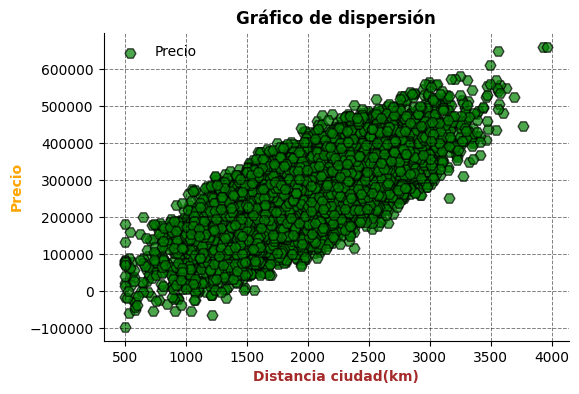

In [174]:
from matplotlib.lines import lineStyles
import matplotlib.pyplot as plt
#configuración general
plt.figure(
    figsize=(6,4),  #tamaño (ancho, alto)
    dpi=100         #resolución
)

#Gráfico de dispersión
plt.scatter(
    x,y,
    marker="H",
    color="green",
    edgecolor="black", #color de borde
    alpha=0.7, #transparencia
    s=60, #tamaño de punto
    label="Precio" #etiqueta
)


#Título
plt.title(
    "Gráfico de dispersión",
    fontsize=12, #tamaño de fuente
    fontweight="bold", #bold:negritas
    color="black",
)

#Etiquetas eje x
plt.xlabel(
    "Distancia ciudad(km)",
    fontsize=10,
    color="brown",
    fontweight="bold"
)

#Etiqueta eje y
plt.ylabel(
    "Precio",
    fontsize=10,
    color="orange",
    fontweight="bold"
)

#tamaño de los tricks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#Márgenes
plt.margins(x=0.05,y=0.05)
plt.gca().spines[["top","right"]].set_visible(False)

plt.grid(
    visible=True,
    linestyle="--",
    linewidth=0.7, #ancho de line
    alpha=0.5, #transparencia
    color="black"
)

#Leyenda
plt.legend(
        fontsize=10,
        loc="best",
        frameon=False
        #bbox_to_anchor=(0.5.-0.15)
)

#Guardar imagen
plt.savefig(
            "Dispersión",
            bbox_inches="tight"
            )

***PASO 3: LINEALIDAD***

**En base a la tendencia de los datos, podemos decir que:**

¿Soportan la suposición de linealidad?

SI, los datos muestran una tendencia aproximadamente lineal.

***PASO 4: COEFICIENTE DE CORRELACION DE LOS DATOS***

**- Interpretación de resultados:**

Test de Pearson

H0: rho = 0     (No hay correlación)

H1: rho ≠ 0     (Sí hay correlación)

alpha = 0.05

**- Conclusion de Pearson**

Al calcular y determinar el coeficiente de correlacion, teniendo como resultado 0.7565, el cual representa un valor es diferente de cero, deducimos que se rechaza H0, es decir, aceptamos H1 qe nos indica que SI HAY CORRELACIÓN entre los datos; a menor distancia (aumenta) = mayor precio (disminuye).

In [175]:
from scipy.stats import pearsonr
r, valor_p=pearsonr(x,y)
print(f"coeficiente de correlación (r):{r:0.4f}")
print(f"valor_p:{valor_p:0.4f}")

coeficiente de correlación (r):0.7565
valor_p:0.0000


***PASO 6: RECTA Y GRAFICA DE REGRESIÓN AJUSTADA***


In [176]:
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()
y_calculada = modelo.predict(x_constante)

modelo.params

,0
const,-33840.620789
pies_cuadrados,148.489390


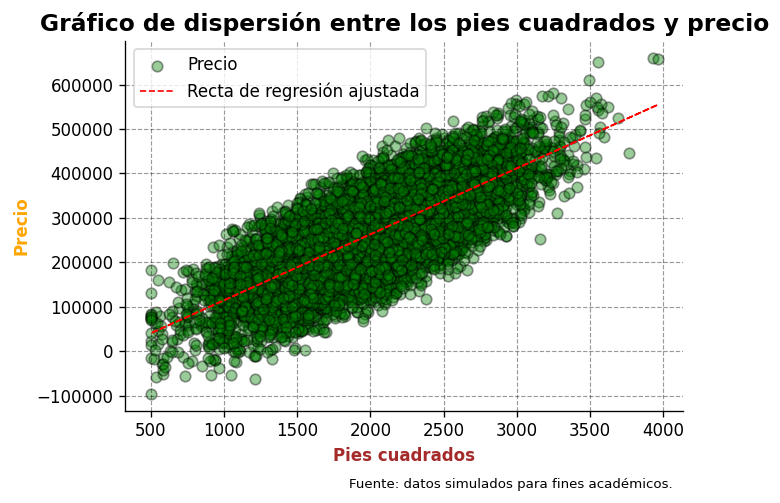

In [177]:
import matplotlib.pyplot as plt

# --- Configuración general del gráfico ---
plt.figure(
    figsize=(6, 4),   # tamaño de la figura (ancho, alto) en pulgadas
    dpi=120           # resolución del gráfico
)

# --- Gráfico de dispersión ---
plt.scatter(
    x,y,
    marker="o",
    color="green",
    edgecolor="black", #color de borde
    alpha=0.4, #transparencia
    s=40, #tamaño de punto
    label="Precio" #etiqueta
)

# --- Gráfico de línea ---
plt.plot(
    x, y_calculada,
    color='red',   # color de la línea
    linewidth=1,        # grosor de la línea
    linestyle='--',        # estilo de línea
    marker='o',           # marcador en cada punto
    markersize=0,         # tamaño del marcador
    markerfacecolor='white',
    markeredgecolor='black',
    label='Recta de regresión ajustada'
)

# --- Título ---
plt.title(
    '''Gráfico de dispersión entre los pies cuadrados y precio''',
    fontsize=14,
    fontweight='bold'
)

#Etiquetas eje x
plt.xlabel(
    "Pies cuadrados",
    fontsize=10,
    color="brown",
    fontweight="bold"
)

#Etiqueta eje y
plt.ylabel(
    "Precio",
    fontsize=10,
    color="orange",
    fontweight="bold"
)

# --- Fuente de los ticks ---
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# --- Márgenes ---
plt.margins(x=0.05, y=0.05)  # espacio extra alrededor de los datos
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior

# Para eliminar márgenes completamente, usar:
# plt.margins(0)

# --- Cuadrícula (opcional, pero didáctica) ---
plt.grid(
    visible=True,
    linestyle='--',
    linewidth=0.7,
    alpha=0.4,
    color="black"
)

# --- Leyenda ---
plt.legend(
    fontsize=10,
    loc='best',
    frameon=True
)

# --- Nota al pie ---
plt.text(
    0.4, -0.2,
    'Fuente: datos simulados para fines académicos.',
    fontsize=8,
    ha='left',
    va='center',
    transform=plt.gca().transAxes
)

# --- Guardar gráfico ---
plt.savefig(
    "grafico de dispersión",
    bbox_inches='tight'
    )

plt.show()


***PASO 5: COEFICIENTE DE DETERMINACIÓN***

In [178]:
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, y_calculada)
print(f'Coeficiente de determinación: {r2: 0.2%}\n')

Coeficiente de determinación:  57.24%



***PASO 7: INTERVALO DE CONFIANZA (95%) PARA LA PENDIENTE DE LA RECTA***

Intervalo de confianza = 1 - alpha ( **1 - 0.95 = 0.05** )


In [179]:
modelo.conf_int(alpha = 0.05)

,0,1
const,-39026.409711,-28654.831867
pies_cuadrados,145.973199,151.005581


***PASO 8: RESIDUALES Y ACTUALIZACION DE GRAFICO DE DISPERSIÓN***

In [180]:
residuales = modelo.resid

residuales

,0
0,-99642.459853
1,15912.078772
2,3795.260230
3,-21103.578237
4,-11556.389636
...,...
9995,71606.182472
9996,-108121.375602
9997,22926.249945
9998,-19179.295853


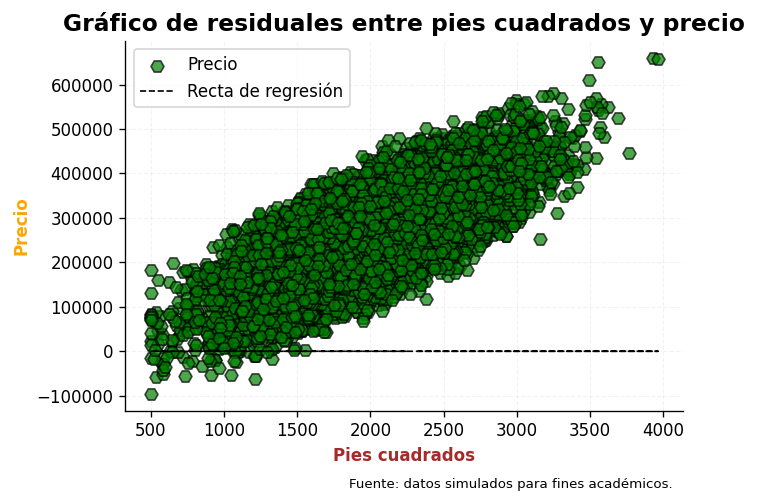

In [181]:
import matplotlib.pyplot as plt

# --- Configuración general del gráfico ---
plt.figure(
    figsize=(6, 4),   # tamaño de la figura (ancho, alto) en pulgadas
    dpi=120           # resolución del gráfico
)

# --- Gráfico de dispersión ---
#Gráfico de dispersión
plt.scatter(
    x,y,
    marker="H",
    color="green",
    edgecolor="black", #color de borde
    alpha=0.7, #transparencia
    s=60, #tamaño de punto
    label="Precio" #(residuales)
)

# --- Gráfico de línea ---
plt.plot(
    x, 0 * y_calculada,
    color='black',   # color de la línea
    linewidth=1,        # grosor de la línea
    linestyle='--',        # estilo de línea
    marker='o',           # marcador en cada punto
    markersize=0,         # tamaño del marcador
    markerfacecolor='white',
    markeredgecolor='black',
    label='Recta de regresión'
)

# --- Título ---
plt.title(
    '''Gráfico de residuales entre pies cuadrados y precio''',
    fontsize=14,
    fontweight='bold'
)

#Etiquetas eje x
plt.xlabel(
    "Pies cuadrados",
    fontsize=10,
    color="brown",
    fontweight="bold"
)

#Etiqueta eje y
plt.ylabel(
    "Precio",
    fontsize=10,
    color="orange",
    fontweight="bold"
)
# --- Fuente de los ticks ---
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# --- Márgenes ---
plt.margins(x=0.05, y=0.05)  # espacio extra alrededor de los datos
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior

# Para eliminar márgenes completamente, usar:
# plt.margins(0)

# --- Cuadrícula (opcional, pero didáctica) ---
plt.grid(
    visible=True,
    linestyle='--',
    linewidth=0.7,
    alpha=0.1,
    color="gray"
)

# --- Leyenda ---
plt.legend(
    fontsize=10,
    loc='best',
    frameon=True
)

# --- Nota al pie ---
plt.text(
    0.4, -0.2,
    'Fuente: datos simulados para fines académicos.',
    fontsize=8,
    ha='left',
    va='center',
    transform=plt.gca().transAxes
)

# --- Guardar gráfico ---
plt.savefig(
    "grafico de dispersión",
    bbox_inches='tight'
    )

plt.show()


**Interpretación de resultados:**

    ¿Parece que se verifican los supuestos?


***PASO 9: NORMALIDAD O FALTA A LA NORMALIDAD.***

**- TEST DE SHAPIRO-WILK**

H0: Hay normalidad (mayor)

H1: No hay normalidad (menor)

alpha = 0.05

**- Conclusion de Shapiro-Wilk**

Al calcular y determinar el valor P, teniendo de resultado que es igual a 0.0000 y en comparacion teniendo un valor alpha de 0.05, siendo asi, este menor en comparacion del nivel de significancia; de esta manera estamos rechazando H0, es decir, aceptando H1, que nos llevaa la conclusion de que NO HAY NORMALIDAD.

In [182]:
from scipy.stats import shapiro
estadistico, valor_p=shapiro(residuales)
print(f"Valor_p: {valor_p:0.4f}")

Valor_p: 0.0000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


***PASO 10: HETEROCEDASTICIDAD O FALTA A LA HETEROCEDASTICIDAD.***

**- TEST DE BREUSH-PAGAN**

H0: No hay heterocedasticidad (dispersión es igual en toda la recta)

H1: Hay Heterocedasticidad (dispersión distinta a lo largo de la recta)

alpha = 0.05

**- Conclusion de BREUSH-PAGAN**

Al calcular y determinar el valor P, teniendo de resultado que es igual a 0.7757 y en comparacion teniendo un valor alpha igual a 0.05, siendo asi, este mayor en comparacion del nivel de significancia; de esta manera se acepta H0 que nos indica que NO HAY HETEROCEDASTICIDAD y hay homocedasticidad

In [183]:
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

valor_p de Breusch-Pagan:  0.7757



***PASO 11: RECTA DE REGRESIÓN PARA INTERPOLACION Y EXTRAPOLACION.***

In [184]:
df.describe()

,pies_cuadrados,num_habitaciones,edad,distancia_ciudad(km),precio
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1999.147496,4.49510,49.516900,15.362148,263011.571609
std,501.021194,1.71116,28.992336,8.325101,98336.945117
min,500.000000,2.00000,0.000000,1.000161,-95613.138249
25%,1663.704735,3.00000,24.000000,8.121636,196791.510684
50%,1998.702512,4.00000,49.000000,15.403146,262497.361236
75%,2335.540444,6.00000,75.000000,22.447530,330445.581908
max,3963.118853,7.00000,99.000000,29.993892,660168.255648


In [185]:
modelo.params

,0
const,-33840.620789
pies_cuadrados,148.489390


**-SUSTITUCION**

f(x)= -33840.620789 + 148.489390 ( x )

Valores para interpolación y extrapolación:

- minimo: 500
- maximo: 3963.11

1.   Interpolar:

-33840.620789 + 148.489390 ( 600 )

2. Interpolar:

-33840.620789 + 148.489390 ( 1116 )

3.   Extrapolar:

-33840.620789 + 148.489390 ( 4000 )


In [186]:
modelo.predict([1,600])

array([55253.01328043])

In [187]:
modelo.predict([1,1116])

array([131873.53858018])

In [188]:
modelo.predict([1,4000])

array([560116.93967415])

In [189]:
modelo.get_prediction([1,90]).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-20476.575679,2533.63243,-25443.005229,-15510.146128,-146634.581483,105681.430126


***PASO 12: TABLA ANOVA ( Y ~ X )***

TEST DE ANOVA (Analysis of Variance)

H0: beta_1 = 0   (No hay correlación)

H1: beta_1 ≠ 0   (Sí hay correlación)

**Interpretación de resultados:**

Al calcular y determinar el valor P, obteniendo asi un resultado de 0.0000 y en comparacion a un valor alpha de 0.05, se determina que este menor en comparacion del nivel de significancia; rechaza la hipótesis nula y se acepta la hipótesis alternativa, lo que indica que SI HAY CORRELACION entre la distancia al centro y el precio de la vivienda.


In [190]:
from statsmodels.formula.api import ols
modelo_lineal = ols('precio~pies_cuadrados', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
pies_cuadrados,1.0,5.534261e+13,5.534261e+13,13381.502672,0.0
Residual,9998.0,4.134927e+13,4.135754e+09,NaN,NaN


####****CONCLUSION****

En este proyecto analice la relación entre existe entre la distancia a la que s encuentra la vivienda del centro y su precio, por medio de un modelo de regresión lineal.
Finalmente los resultados nos muestran que la ubicación a la que se encuentr esta, si es algo que afecta o se relaciona directaente con el valor de las viviendas, ya que a mayor distancia del centro, menor es el precio. Este análisis permite realizar estimaciones y demostrar tambien que es de mucha utulidad este proceso para tomar correctamente.